## Create population, connect neurons with specific connection specification (strategy)
and also set the type/kind of synapse 

In [7]:
import nest
import pylab

nest.ResetKernel()

totalNeurons = 3

population = nest.Create(
    "iaf_psc_alpha", 
    totalNeurons
)

connection_dict = {'rule': 'one_to_one'}
synapse_dict ={"model": "static_synapse", "weight":2.5, "delay":0.5, 'receptor_type': 1}


**Connect the population with itself, all to all and take static_synapse as templae
and alter some defaults.**

In [8]:
nest.Connect(
    population, 
    population, 
    { # connection_dict
        "rule": "all_to_all", 
     }, 
    { # synapse type
        "model": "static_synapse", 
        "weight": {"distribution": "uniform", "low": -5.0, "high": 5.0},
        "delay":1.0, 
    }
)

**Take one neuron and plug to it two noise generators.**

In [9]:
noise_ex = nest.Create("poisson_generator", params={"rate": 80000.0})
noise_in = nest.Create("poisson_generator", params={"rate": 15000.0})

nest.Connect(noise_ex, [population[0]], syn_spec={"weight": 1.2})
nest.Connect(noise_in, [population[0]], syn_spec={"weight": -2.0})



**Connect multimeter, simulate and plot measures.**


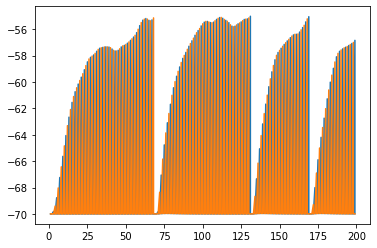

In [10]:
multimeter = nest.Create("multimeter", params={"withtime": True, "record_from": ["V_m"]})

nest.Connect(multimeter,population)

nest.Simulate(200.0)

pylab.figure(1)
dmm = nest.GetStatus(multimeter)[0]

for index in range(0, totalNeurons-1):
    Vms = dmm["events"]["V_m"][index::2]
    ts = dmm["events"]["times"][index::2]
    pylab.plot(ts, Vms)

pylab.show()